# Phylogenetic trees HMF data, run 20220809

In [25]:
import json
import pandas as pd
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
pts = ['pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8','pt10','pt11']
samples_dict = json.load( open( "/workspace/projects/sjd_pediatric_tumors/code/sample_ids.json", "rb" ) )

In [27]:
def prepare_table(pt1_t1_mutect_df,pt1_t2_mutect_df,snv):
    df1 = pt1_t1_mutect_df[['#CHROM','POS','REF','ALT','t_CCF','mut_type']]
    df1.drop_duplicates(subset=['#CHROM','POS','REF','ALT'],keep='first',inplace=True)
    df2 = pt1_t2_mutect_df[['#CHROM','POS','REF','ALT','t_CCF','mut_type']]
    df2.drop_duplicates(subset=['#CHROM','POS','REF','ALT'],keep='first',inplace=True)
    t1_t2_df = pd.merge(df1,df2,on=['#CHROM','POS','REF','ALT','mut_type'], how='outer',indicator='tumor', suffixes=('_t1','_t2'))
    t1_t2_df['tumor'] = t1_t2_df['tumor'].replace('left_only','T1')
    t1_t2_df['tumor'] = t1_t2_df['tumor'].replace('right_only','T2')
    if snv == True:
        t1_t2_df = t1_t2_df[t1_t2_df['mut_type']=='snv']
#     t1_t2_df = t1_t2_df.drop(columns=['mut_type'])
    return t1_t2_df

In [28]:
def plot_tree(t1_t2_df,title,labels=None):
    plt.figure(figsize=(2,5)) 
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax1 = plt.axes(frameon=False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)

    muts_both = len(t1_t2_df[t1_t2_df['tumor']=='both'])
    muts_t1 = len(t1_t2_df[t1_t2_df['tumor']=='T1'])
    muts_t2 = len(t1_t2_df[t1_t2_df['tumor']=='T2'])
    print('Both:')
    display(t1_t2_df[t1_t2_df['tumor']=='both'].groupby('mut_type').count())
    print('T1:')
    display(t1_t2_df[t1_t2_df['tumor']=='T1'].groupby('mut_type').count())
    print('T2:')
    display(t1_t2_df[t1_t2_df['tumor']=='T2'].groupby('mut_type').count())
    
    if labels !=None:
        tumor1 = labels[0]
        tumor2 = labels[1]
    else:
        tumor1 = 'Tumor 1'
        tumor2 = 'Tumor 2'

    plt.plot([0,-1],[-muts_both,-muts_both-muts_t1],color='mediumseagreen',linewidth=5) #Line T1
    plt.plot([0,1],[-muts_both,-muts_both-muts_t2],color='lightcoral',linewidth=5) #Line T2
    plt.plot([0,0],[0,-muts_both],color='darkorange',linewidth=5) #Line both
    plt.text(x=-1.3,y=-(muts_both+muts_t1)*1.1,s=tumor1,fontsize=12) #Text Tumor 1
    plt.text(x=1,y=-(muts_both+muts_t2)*1.1,s=tumor2,fontsize=12) #Text Tumor 2
    plt.text(x=0.1,y=-(muts_both)/2,s=muts_both,fontsize=12) # Number of mutations both
    plt.text(x=-0.9,y=-(muts_both+muts_t1/2),s=muts_t1,fontsize=12,ha='center') #Number of mutations T1
    plt.text(x=0.9,y=-(muts_both+muts_t2/2),s=muts_t2,fontsize=12,ha='center') #Number of mutations T2
    plt.title(title,fontsize=14)

In [29]:
t1_df[t1_df['clonal']==True].columns

Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'NORMAL', 'TUMOR', 't_AF', 'n_AF', 'DP_tumor', 't_alt_reads',
       't_ref_reads', 'DP_normal', 'n_alt_reads', 'n_ref_reads', 'mut_type',
       'GT_normal', 'GT_tumor', 'Gene', 'Feature', 'Feature_type',
       'Consequence', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'Existing_variation', 'IMPACT', 'DISTANCE',
       'STRAND', 'FLAGS', 'SYMBOL', 'SYMBOL_SOURCE', 'HGNC_ID', 'CANONICAL',
       'ENSP', 'SOURCE', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF',
       'CLIN_SIG', 'SOMATIC', 'PHENO', 'gnomADg', 'gnomADg_AF', 'gnomADg_NFE',
       'subset_origin', 'SAMPLE', 'Damaging', 'mut', 'aa_change', 'n_AF_real',
       'intogen', 'germline', 'germline_mskcc', 'germline_akh', 'role',
       'variant_type', 'CN', 't_CCF', 'n_CCF', 'clonal'],
      dtype='object')

pt1
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1251,1251,1251,1251,1251,0,1251


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1578,1578,1578,1578,0,1578,1578


pt2
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1259,1259,1259,1259,1259,0,1259


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,2231,2231,2231,2231,0,2231,2231


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


pt3
Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,5,5,5,5,5,5,5


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,106,106,106,106,106,0,106


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,89,89,89,89,0,89,89


pt4
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,270,270,270,270,270,0,270


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,771,771,771,771,0,771,771


pt5
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,531,531,531,531,531,0,531


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1176,1176,1176,1176,0,1176,1176


pt6


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,2338,2338,2338,2338,2338,0,2338


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1367,1367,1367,1367,0,1367,1367


pt7
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,282,282,282,282,282,282,282


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,7321,7321,7321,7321,7321,0,7321


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,6136,6136,6136,6136,0,6136,6136


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


pt8
Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1969,1969,1969,1969,1969,0,1969


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,270,270,270,270,0,270,270


pt10


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,370,370,370,370,370,0,370


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,2659,2659,2659,2659,0,2659,2659


pt11


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,2014,2014,2014,2014,2014,0,2014


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,242,242,242,242,0,242,242


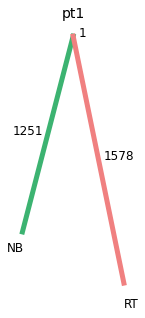

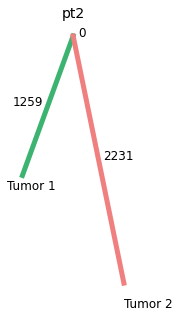

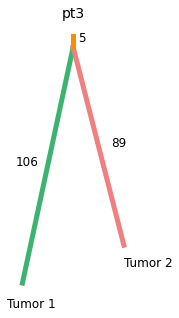

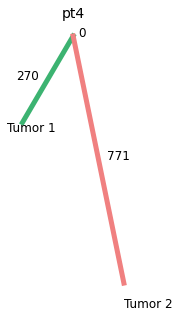

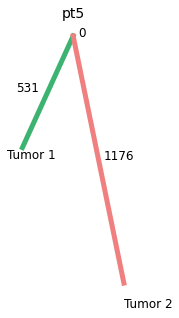

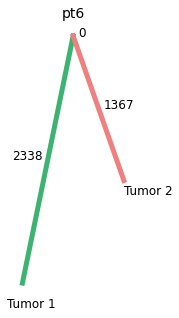

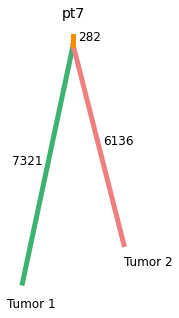

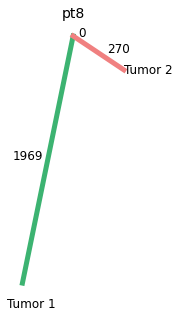

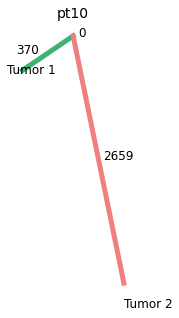

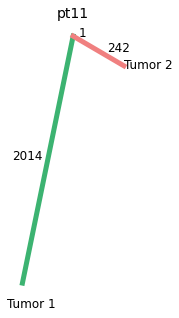

In [30]:
for pt in pts:
    print(pt)
    normal_id = samples_dict[pt]['normal']
    tumor_id = samples_dict[pt]['tumor1']

    t1_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'
                  +pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    

    tumor_id = samples_dict[pt]['tumor2']

    t2_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'
                  +pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    
    t1_df = t1_df[t1_df['clonal']==True]
    t2_df = t2_df[t2_df['clonal']==True]
            
    t1_t2_df = prepare_table(t1_df,t2_df,snv=True)
    title = pt
    if pt == 'pt1':
        labels = ['NB','RT']
    else:
        labels = None
    plot_tree(t1_t2_df,title,labels)

pt1
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,511,511,511,511,511,0,511
mnv,5,5,5,5,5,0,5
snv,1251,1251,1251,1251,1251,0,1251


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,318,318,318,318,0,318,318
mnv,10,10,10,10,0,10,10
snv,1578,1578,1578,1578,0,1578,1578


pt2
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,414,414,414,414,414,0,414
mnv,8,8,8,8,8,0,8
snv,1259,1259,1259,1259,1259,0,1259


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,376,376,376,376,0,376,376
mnv,15,15,15,15,0,15,15
snv,2231,2231,2231,2231,0,2231,2231


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


pt3
Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,2,2,2,2,2,2,2
snv,5,5,5,5,5,5,5


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,73,73,73,73,73,0,73
snv,106,106,106,106,106,0,106


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,61,61,61,61,0,61,61
snv,89,89,89,89,0,89,89


pt4
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,102,102,102,102,102,0,102
mnv,1,1,1,1,1,0,1
snv,270,270,270,270,270,0,270


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,76,76,76,76,0,76,76
snv,771,771,771,771,0,771,771


pt5
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,119,119,119,119,119,0,119
mnv,3,3,3,3,3,0,3
snv,531,531,531,531,531,0,531


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,74,74,74,74,0,74,74
mnv,5,5,5,5,0,5,5
snv,1176,1176,1176,1176,0,1176,1176


pt6


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,256,256,256,256,256,0,256
mnv,31,31,31,31,31,0,31
snv,2338,2338,2338,2338,2338,0,2338


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,159,159,159,159,0,159,159
mnv,2,2,2,2,0,2,2
snv,1367,1367,1367,1367,0,1367,1367


pt7
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,6,6,6,6,6,6,6
mnv,5,5,5,5,5,5,5
snv,282,282,282,282,282,282,282


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,497,497,497,497,497,0,497
mnv,56,56,56,56,56,0,56
snv,7321,7321,7321,7321,7321,0,7321


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,163,163,163,163,0,163,163
mnv,67,67,67,67,0,67,67
snv,6136,6136,6136,6136,0,6136,6136


pt8
Both:


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,2549,2549,2549,2549,2549,0,2549
mnv,17,17,17,17,17,0,17
snv,1969,1969,1969,1969,1969,0,1969


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,61,61,61,61,0,61,61
mnv,1,1,1,1,0,1,1
snv,270,270,270,270,0,270,270


pt10


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,239,239,239,239,239,0,239
snv,370,370,370,370,370,0,370


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,788,788,788,788,0,788,788
mnv,38,38,38,38,0,38,38
snv,2659,2659,2659,2659,0,2659,2659


pt11


/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/msanchezg/miniconda3/envs/process_vc/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Both:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
snv,1,1,1,1,1,1,1


T1:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,1749,1749,1749,1749,1749,0,1749
mnv,4,4,4,4,4,0,4
snv,2014,2014,2014,2014,2014,0,2014


T2:


,#CHROM,POS,REF,ALT,t_CCF_t1,t_CCF_t2,tumor
mut_type,,,,,,,
indel,32,32,32,32,0,32,32
snv,242,242,242,242,0,242,242


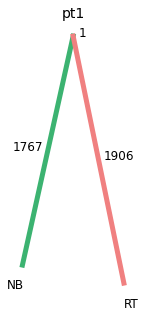

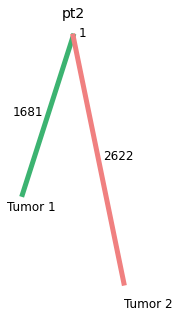

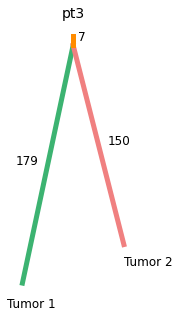

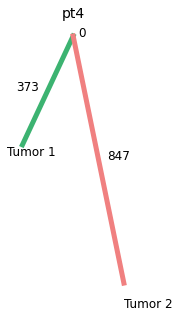

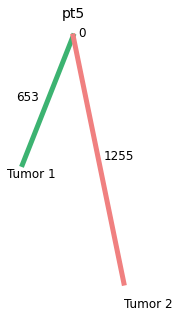

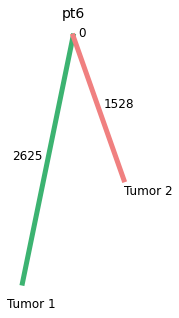

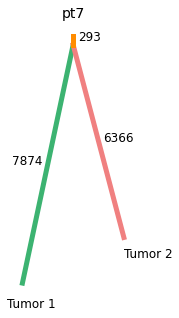

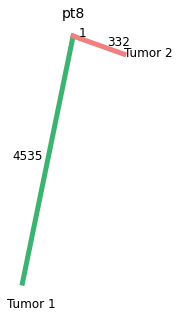

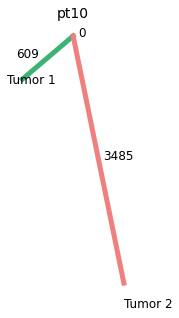

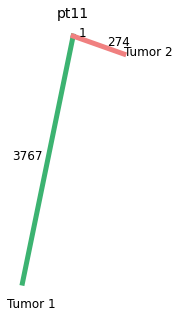

In [31]:
for pt in pts:
    print(pt)
    normal_id = samples_dict[pt]['normal']
    tumor_id = samples_dict[pt]['tumor1']

    t1_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'
                  +pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    

    tumor_id = samples_dict[pt]['tumor2']

    t2_df = pd.read_csv('/workspace/projects/sjd_pediatric_tumors/mafs_platinum/20220809/'
                  +pt+'/'+tumor_id+'_vs_'+normal_id+'/filter_and_annot/'
                  +tumor_id+'_vs_'+normal_id+'_filt.maf.gz',sep='\t')
    
    t1_df = t1_df[t1_df['clonal']==True]
    t2_df = t2_df[t2_df['clonal']==True]
            
    t1_t2_df = prepare_table(t1_df,t2_df,snv=False)
    title = pt
    if pt == 'pt1':
        labels = ['NB','RT']
    else:
        labels = None
    plot_tree(t1_t2_df,title,labels)